# Some initial exploration

In [16]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import torch
from collections import defaultdict, Counter
import random
import math
import pickle


%matplotlib inline
%load_ext autoreload
%autoreload 2
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [18]:
plt.rcParams['figure.dpi'] = 300
plt.style.use("bmh")

In [3]:
df = pd.read_csv("../data/training_data/train_and_valid.csv")
#df = pd.read_csv("../data/provo.csv")

In [4]:
df[df.sentence_id == 3]

,sentence_id,word_id,word,nFix,FFD,GPT,TRT,fixProp
75,3,0,Shire,12.643678,3.192550,4.237259,5.281968,58.333333
76,3,1,became,40.229885,4.536238,5.694354,13.526238,91.666667
77,3,2,famous,28.735632,3.852366,8.041513,8.189285,100.000000
78,3,3,for,2.298851,0.797278,0.797278,0.797278,16.666667
79,3,4,her,10.344828,2.718306,2.718306,3.797381,58.333333
80,3,5,roles,14.942529,2.560225,4.549985,4.515619,66.666667
81,3,6,as,9.195402,1.584247,1.584247,2.498368,50.000000
82,3,7,the,10.344828,2.804220,2.804220,3.838620,50.000000
83,3,8,wife,16.091954,4.051686,5.141070,5.608440,83.333333
84,3,9,of,9.195402,3.570569,4.003574,3.800818,58.333333


In [5]:
df.describe()

,sentence_id,word_id,nFix,FFD,GPT,TRT,fixProp
count,15736.000000,15736.000000,15736.000000,15736.000000,15736.000000,15736.000000,15736.000000
mean,399.746823,11.662239,15.101778,3.191023,6.345511,5.309610,67.057234
std,232.185247,9.415771,9.424877,1.422461,5.906529,3.641611,26.059847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,195.000000,4.000000,8.045977,2.123784,2.888988,2.616069,50.000000
50%,401.000000,10.000000,13.793103,3.323138,4.989862,4.684010,75.000000
75%,603.000000,17.000000,20.689655,4.237259,7.732224,7.216743,90.909091
max,799.000000,64.000000,100.000000,12.240111,100.000000,39.585553,100.000000


1. establish a vocabulary
2. average the word vectors

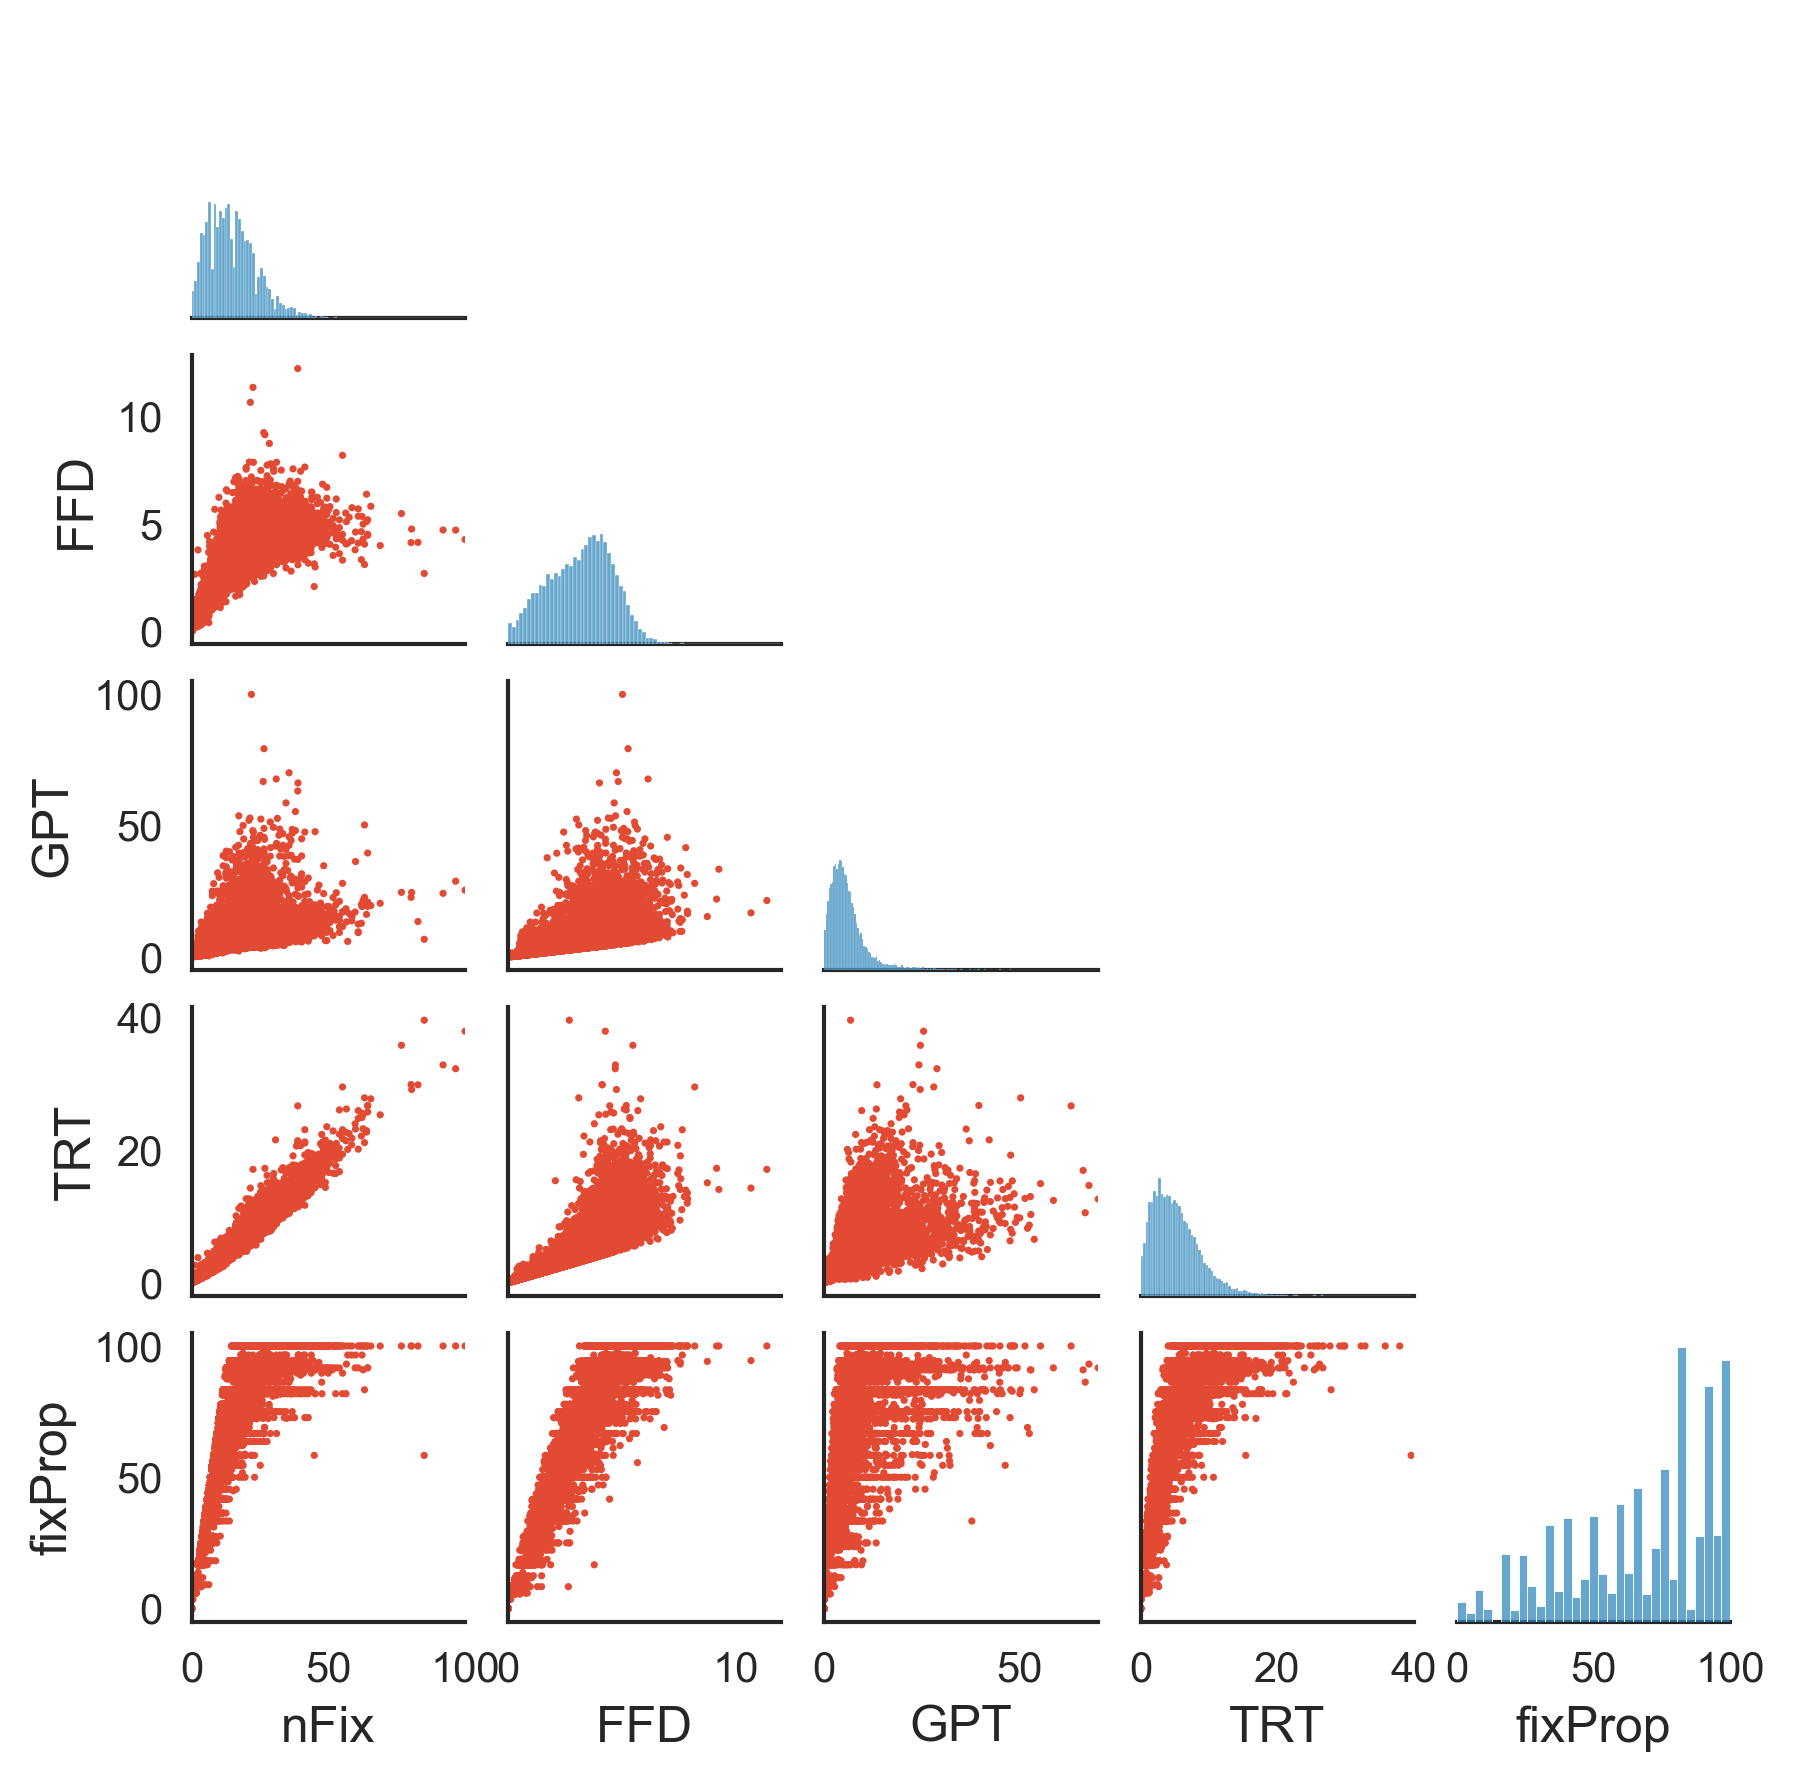

In [6]:
sns.set_style("white")
g = sns.pairplot(df[['nFix', 'FFD', 'GPT', 'TRT', 'fixProp']],
                 corner=True, height=1.2, plot_kws={'edgecolor':"none", 's':3})
#g.set(xlim=(0, 100))
g.axes[0, 0].set_xlim((0, 100))
g.axes[1, 1].set_xlim((0, 12))
g.axes[2, 2].set_xlim((0, 70))
g.axes[3, 3].set_xlim((0, 40))
g.axes[4, 4].set_xlim((0, 100))
plt.show()

# Plan

In [74]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from textblob import TextBlob, Word

from matplotlib.pyplot import figure


In [99]:
2 + 2 + 2 + 3 + 0.5

9.5

## Plot

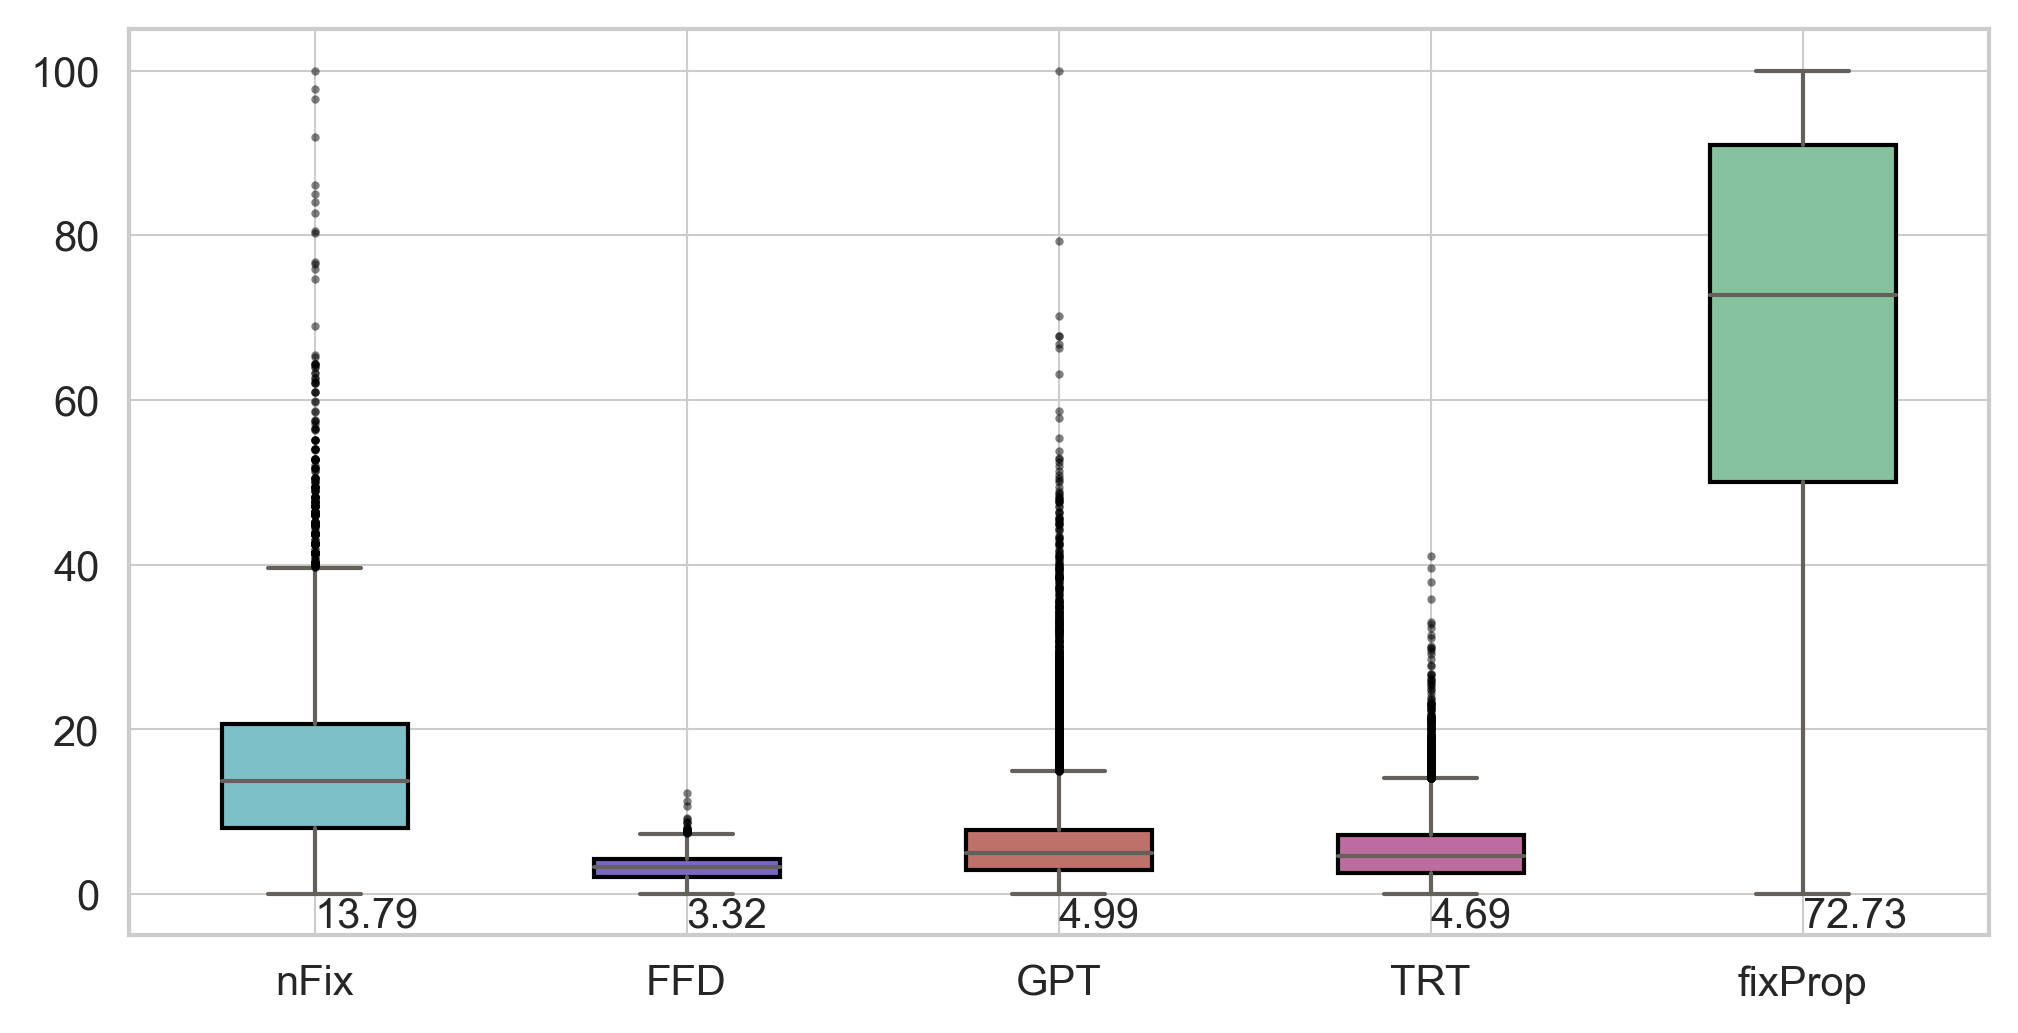

In [78]:
fig = plt.figure(figsize =(8, 4))
ax = fig.add_subplot(111)

bp = ax.boxplot(df[['nFix', 'FFD', 'GPT', 'TRT', 'fixProp']], patch_artist = True, vert = 1) # notch ='True'

ax.set_facecolor('white')

colors = ['#7ec0c8', '#7b67c0',
          '#bd7169', '#bc6c9e', '#86c29d']


 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#64615d',
                linestyle ="-")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#64615d') #            linewidth = 2
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='#64615d')
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='o',                
                markersize = 1,
              color ='#e7298a',
              alpha = 0.5)

# x-axis labels
ax.set_xticklabels(['nFix', 'FFD',
                    'GPT', 'TRT', 'fixProp'])
 
for ind, xtick in enumerate(ax.get_xticks()):
    ax.annotate(np.round(bp['medians'][ind].get_ydata()[0], 2), (xtick, -4), annotation_clip=False)


## Data preprocessing

In [2]:
df_train_original = pd.read_csv("../data/training_data/train_and_valid.csv")
df_test_original = pd.read_csv("../data/test_data/truth.txt")

In [3]:
df = pd.concat([df_train_original, df_test_original])

In [4]:
df['word'] = df['word'].str.replace('.<EOS>','')

/var/folders/1c/95b9dlpd2xv9yjh6v0xw08700000gn/T/ipykernel_34083/786796607.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['word'] = df['word'].str.replace('.<EOS>','')


In [5]:
df['word'] = df['word'].str.lower()

In [6]:
df = df[df.word.str.isalpha()]

In [167]:
list_ = []
for i in df.word.values:
    if i == 'men':
        list_.append('man')
    elif i == 'women':
        list_.append('woman')
    elif i in ['was', 'is', 'were', 'are']:
        list_.append('be')
    else:
        list_.append(i)

In [168]:
df['word'] = list_

In [7]:
df['word'].value_counts()

the          1060
of            618
and           615
a             548
in            524
             ... 
swedish         1
curves          1
described       1
louisa          1
pursued         1
Name: word, Length: 4400, dtype: int64

In [170]:
from nltk.stem.snowball import SnowballStemmer
snow_stemmer = SnowballStemmer(language='english')

In [171]:
lemm = []
for i in df.word.values:
    lemm.append(snow_stemmer.stem(i))

In [172]:
df['word'] = lemm

In [173]:
df['word'].value_counts()

the        1060
of          618
and         615
be          595
a           548
           ... 
eden          1
ash           1
separ         1
glee          1
borough       1
Name: word, Length: 3592, dtype: int64

In [174]:
df.head(15)

,sentence_id,word_id,word,nFix,FFD,GPT,TRT,fixProp
0,0,0,carlucci,28.397566,4.642973,6.190631,10.343594,94.117647
1,0,1,be,12.981744,3.534385,5.263977,4.565348,76.470588
2,0,2,deputi,25.152130,5.809781,9.926357,9.145251,100.000000
3,0,3,defens,20.283976,5.261551,8.092455,8.359293,88.235294
4,0,4,secretari,17.849899,4.135982,4.507129,5.686066,88.235294
5,0,5,from,12.981744,4.429503,5.169371,5.295512,82.352941
7,0,7,until,11.359026,3.216605,3.968602,3.786667,64.705882
9,0,9,nation,19.472617,3.694487,8.643111,6.894112,82.352941
10,0,10,secur,20.283976,4.252420,6.098451,7.313775,94.117647
11,0,11,advisor,13.793103,3.672655,4.296085,4.689064,76.470588


In [192]:
df.to_csv('../data/Zuco_stem.csv', index=False)

## word frequency

In [8]:
df_dict = dict(df['word'].value_counts())

In [9]:
count = []
for ind, len in enumerate(list(df_dict.values())):
    if len == 4:
        print(ind)
        break

433


In [10]:
labels_1 =['man', 'he', 'brother', 'nephew', 'son', 'male']
labels_2 =['woman', 'she',  'sister', 'niece', 'daughter','female']

In [11]:
for i in labels_2:
    print(i, df_dict[i])

woman 2
she 49
sister 3
niece 1
daughter 8
female 1


In [12]:
for i in labels_1:
    print(i, df_dict[i])

man 11
he 267
brother 18
nephew 2
son 23
male 3


In [13]:
da_freq = pd.DataFrame(df_dict.items(), columns=['Word', 'Frequency'])

In [14]:
da_freq

,Word,Frequency
0,the,1060
1,of,618
2,and,615
3,a,548
4,in,524
...,...,...
4395,swedish,1
4396,curves,1
4397,described,1
4398,louisa,1


In [82]:
np.sum(da_freq.Frequency.values)

16672

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'the'),
  Text(1, 0, 'of'),
  Text(2, 0, 'and'),
  Text(3, 0, 'a'),
  Text(4, 0, 'in'),
  Text(5, 0, 'to'),
  Text(6, 0, 'was'),
  Text(7, 0, 'he'),
  Text(8, 0, 'his'),
  Text(9, 0, 'is'),
  Text(10, 0, 'as'),
  Text(11, 0, 'for'),
  Text(12, 0, 'with'),
  Text(13, 0, 'that'),
  Text(14, 0, 'on'),
  Text(15, 0, 'an'),
  Text(16, 0, 'from'),
  Text(17, 0, 'it'),
  Text(18, 0, 'at'),
  Text(19, 0, 'by'),
  Text(20, 0, 'but'),
  Text(21, 0, 'this'),
  Text(22, 0, 'who'),
  Text(23, 0, 'one'),
  Text(24, 0, 'film'),
  Text(25, 0, 'movie'),
  Text(26, 0, 'be'),
  Text(27, 0, 'bush'),
  Text(28, 0, 'she'),
  Text(29, 0, 'its'),
  Text(30, 0, 'has'),
  Text(31, 0, 'after'),
  Text(32, 0, 'her'),
  Text(33, 0, 'american'),
  Text(34, 0, 'president'),
  Text(

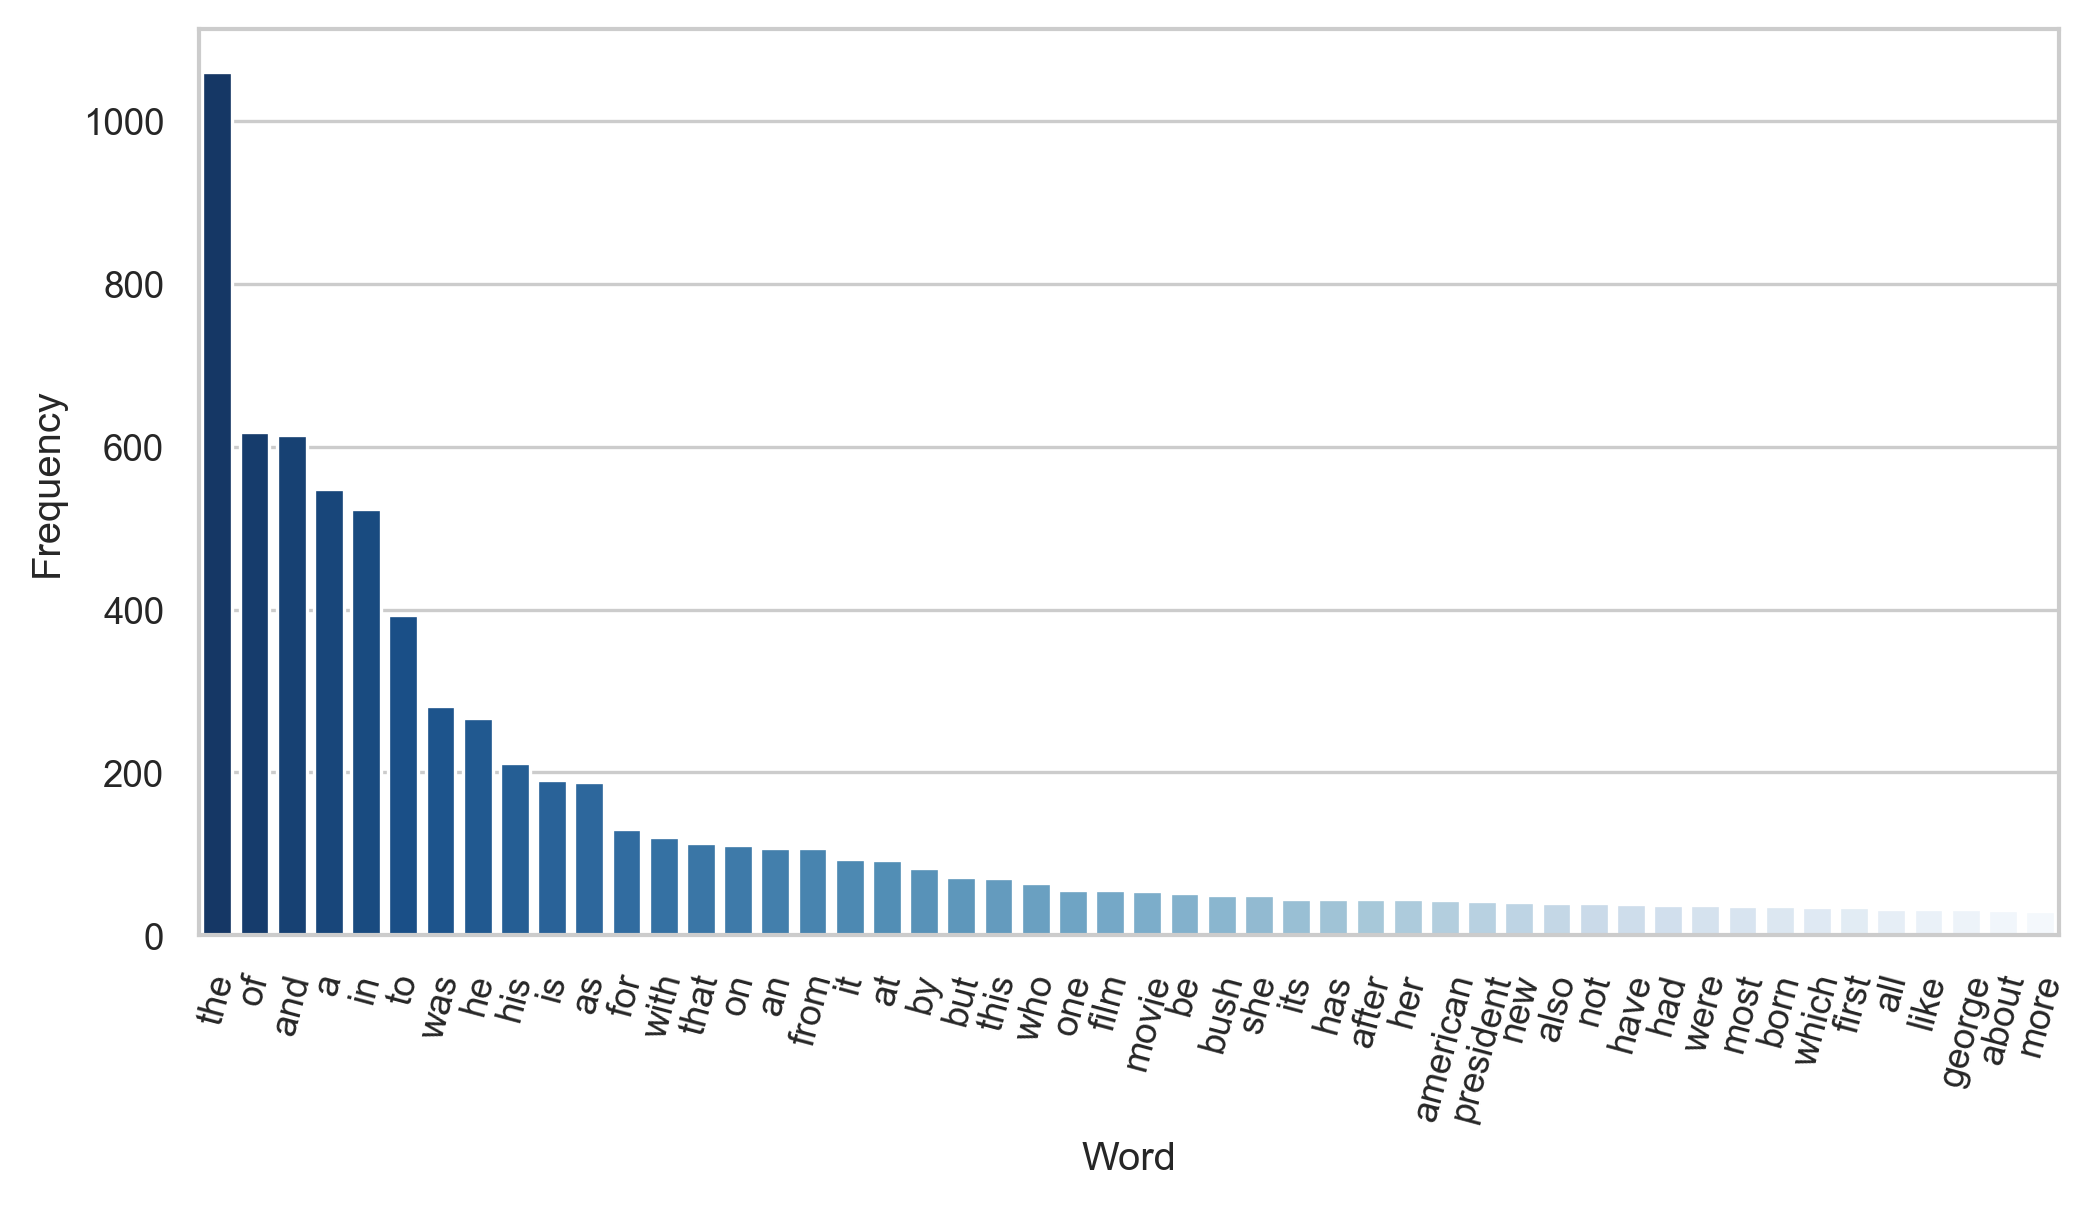

In [80]:
figure(figsize=(8, 4))
sns.set_context("paper")
sns.set_style("whitegrid")
sns.barplot(x = 'Word', y='Frequency', data = da_freq.head(50), palette=("Blues_r"), orient = 'v')
plt.xticks(rotation=75)


In [56]:
a = sns.cubehelix_palette(start=0.5, rot=-.5, as_cmap=True)

## the most similar words

In [83]:
df_new = df.copy()
df_new = df_new.set_index('word').iloc[:,2:]

def similar_words(data, k = 10):
    distance_matrix = euclidean_distances(data)
    # Note the range of 1:k+1 
    # You need to discard the first column 
    # as that would have the index of the same input word 
    # because distance between the same word is the minimum (i.e. 0) 
    top_k_ids = np.argsort(distance_matrix, axis=-1)[:, 1:k+1]

    # The input words
    inputs = data.index.values

    # We go through each column of top_k_ids and index inputs 
    # and stack those results on columns axis
    outputs = np.stack([inputs[top_k_ids[:, i]] for i in range(k)], axis=-1)
    return outputs

In [84]:
outputs = similar_words(df_new)

In [85]:
for i in range(50):
    print(f'{df.word.values[i]}: {outputs[i]}')

carlucci: ['submissive' 'rosemary' 'founded' 'attended' 'pierce' 'groucho' 'armando'
 'prominent' 'against' 'married']
was: ['elder' 'when' 'out' 'next' 'would' 'was' 'from' 'without' 'and' 'were']
deputy: ['abraham' 'maria' 'piece' 'working' 'accepted' 'governor' 'passer'
 'engineers' 'intelligence' 'forgiveness']
defense: ['snarky' 'adopted' 'homeland' 'refused' 'brought' 'actor' 'trophy'
 'tycoon' 'tulane' 'ulysses']
secretary: ['publisher' 'impressed' 'child' 'rose' 'kennedy' 'director' 'university'
 'public' 'spring' 'welfare']
from: ['brother' 'libby' 'across' 'also' 'one' 'third' 'the' 'political' 'movie'
 'show']
until: ['second' 'were' 'area' 'an' 'came' 'first' 'the' 'joined' 'his' 'first']
national: ['clear' 'few' 'singer' 'winning' 'name' 'while' 'young' 'audiences'
 'disco' 'talent']
security: ['throwing' 'contact' 'tennessee' 'presidential' 'appeared' 'teammate'
 'practicing' 'season' 'stayed' 'alabama']
advisor: ['were' 'first' 'his' 'married' 'some' 'army' 'ten' 'had' '

## Average features

In [86]:
my_df =[]
number_list = ['nFix', 'FFD', 'GPT', 'TRT', 'fixProp']

In [87]:
for i in df_dict.keys():
    my_df.append(list(df[df['word'] == i][number_list].mean()))

In [88]:
df[df['word'] == 'he'][number_list].mean()

nFix        4.752511
FFD         1.315503
GPT         1.797553
TRT         1.654981
fixProp    27.920412
dtype: float64

In [89]:
df_uniq = pd.DataFrame(my_df, columns = number_list)

In [90]:
df_uniq.insert(0, "word", list(df_dict.keys()), True)

In [91]:
df_uniq

,word,nFix,FFD,GPT,TRT,fixProp
0,the,8.089145,2.037560,3.279184,2.620190,46.250203
1,of,5.558040,1.492221,2.538022,1.791782,33.937491
2,and,7.638862,1.941896,3.306894,2.450817,44.722639
3,a,5.309940,1.491783,2.447444,1.775713,32.829983
4,in,5.313665,1.489553,2.466216,1.798441,32.379519
...,...,...,...,...,...,...
4395,swedish,24.137931,4.171965,6.316368,7.849067,83.333333
4396,curves,14.942529,3.625554,4.642771,5.161689,66.666667
4397,described,18.390805,3.773326,19.523008,6.354170,91.666667
4398,louisa,31.034483,4.800852,5.474415,11.835458,100.000000


In [201]:
df_uniq.to_csv('../data/Zuco_uniq.csv', index=False)

In [92]:
df_new  = df_uniq.copy()
df_new = df_new.set_index('word')

In [93]:
outputs = similar_words(df_new)

In [100]:
for i in range(50):
    print(f'{df_uniq.word.values[50+ i]}: {outputs[i]}')

during: ['for' 'his' 'why' 'let' 'search' 'an' 'but' 'she' 'speak' 'and']
or: ['a' 'spine' 'ship' 'lofty' 'o' 'in' 'ask' 'to' 'sea' 'sit']
john: ['an' 'us' 'ike' 'search' 'as' 'any' 'let' 'the' 'et' 'why']
when: ['in' 'spine' 'ship' 'of' 'lofty' 'o' 'ask' 'sea' 'sit' 'busy']
became: ['a' 'spine' 'ship' 'lofty' 'o' 'of' 'ask' 'sea' 'sit' 'busy']
united: ['do' 'of' 'at' 'sad' 'tv' 'spine' 'by' 'ship' 'lofty' 'o']
been: ['from' 'since' 'left' 'novel' 'got' 'one' 'while' 'central' 'did' 'man']
family: ['we' 'lilo' 'it' 'al' 'line' 'alive' 'our' 'brain' 'in' 'ken']
time: ['for' 'but' 'the' 'she' 'speak' 'why' 'let' 'study' 'park' 'search']
only: ['girl' 'on' 'gift' 'or' 'by' 'nor' 'wade' 'yarn' 'cox' 'gaze']
while: ['up' 'ike' 'us' 'and' 'et' 'any' 'all' 'an' 'search' 'wade']
than: ['the' 'his' 'let' 'but' 'she' 'an' 'why' 'speak' 'search' 'and']
later: ['get' 'iii' 'my' 'how' 'not' 'this' 'into' 'who' 'until' 'said']
married: ['go' 'five' 'just' 'vote' 'face' 'after' 'yet' 'out' 'want' 'fi

In [101]:
'frog' in df_uniq.word.values

False

In [2]:
df_uniq = pd.read_csv("../data/Zuco_uniq.csv")
#df = pd.read_csv("../data/provo.csv")

In [205]:
def word_vector(word):
    number_list = ['nFix', 'FFD', 'GPT', 'TRT', 'fixProp']
    return np.array(df_uniq[df_uniq['word'] == word][number_list])[0]

In [206]:
distance_vector = []
for i in df_uniq.word.values:
    distance_vector.append(math.dist(word_vector(i), (word_vector('father') - word_vector('mother')+ word_vector('son'))))
    
distance_vector = np.array(distance_vector)
top_k_ids = np.argsort(distance_vector, 0)[:10]
df_uniq.word.values[top_k_ids]

array(['king', 'inning', 'satir', 'rage', 'core', 'littl', 'twice', 'han',
       'center', 'flor'], dtype=object)

In [207]:
def calculate_sim(vector, k):
    distance_vector = []
    for i in df_uniq.word.values:
        distance_vector.append(math.dist(word_vector(i), vector))
        
    distance_vector = np.array(distance_vector)
    top_k_ids = np.argsort(distance_vector, 0)[:k]
    return df_uniq.word.values[top_k_ids]

In [211]:
calculate_sim(word_vector('she') - word_vector('he') + word_vector('man'), 100)

array(['choic', 'home', 'star', 'fresh', 'puerto', 'greatest', 'british',
       'treati', 'battl', 'young', 'caus', 'difficult', 'various', 'void',
       'visual', 'join', 'sum', 'rot', 'basketbal', 'matur', 'should',
       'view', 'royal', 'superior', 'chair', 'great', 'major', 'kind',
       'style', 'cecil', 'wolsey', 'genr', 'cameo', 'hors', 'win',
       'anyon', 'impud', 'smoke', 'connect', 'atavist', 'mayor', 'eldest',
       'coach', 'cowboy', 'unlik', 'begin', 'liberti', 'buri', 'ghost',
       'indiffer', 'hair', 'through', 'learn', 'polic', 'gag', 'port',
       'council', 'saturday', 'spirit', 'aw', 'lack', 'clay', 'fabric',
       'come', 'elleri', 'whose', 'whop', 'fund', 'south', 'help',
       'front', 'boil', 'miss', 'clear', 'banker', 'hous', 'spend',
       'shift', 'veer', 'enough', 'subtitl', 'shorten', 'quick', 'amus',
       'make', 'former', 'ronald', 'erith', 'deliv', 'kennedi', 'lazi',
       'reagan', 'cliff', 'comic', 'bookkeep', 'album', 'known',
       

In [41]:
# calculate_sim(word_vector('father') - word_vector('mother') + word_vector('son'), 2113)

TSNE

In [4]:
from sklearn.manifold import TSNE

In [44]:

def tsne_plot():
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in df_uniq.word.values:
        tokens.append(word_vector(word))
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [5]:
df_uniq_10 = df_uniq.head(10)

In [7]:
df_uniq_10

,word,nFix,FFD,GPT,TRT,fixProp
0,the,8.089145,2.037560,3.279184,2.620190,46.250203
1,of,5.558040,1.492221,2.538022,1.791782,33.937491
2,and,7.638862,1.941896,3.306894,2.450817,44.722639
3,a,5.309940,1.491783,2.447444,1.775713,32.829983
4,in,5.313665,1.489553,2.466216,1.798441,32.379519
5,to,5.855912,1.600083,2.612959,1.923011,35.593027
6,was,12.374270,2.800237,4.239480,4.120551,63.682163
7,he,4.752511,1.315503,1.797553,1.654981,27.920412
8,his,8.315932,2.157161,3.548687,2.826392,46.982225
9,is,6.748430,1.896492,2.788388,2.387436,39.847511


In [9]:
labels = []
tokens = []
for word in df_uniq_10.word.values:
    tokens.append(word_vector(word))
    labels.append(word)
tokens = np.array(tokens)

In [10]:
tokens

array([[ 8.08914501,  2.03756014,  3.27918365,  2.62018962, 46.25020341],
       [ 5.55804048,  1.49222134,  2.53802217,  1.79178214, 33.93749075],
       [ 7.63886176,  1.94189634,  3.30689385,  2.45081716, 44.72263946],
       [ 5.30994012,  1.49178258,  2.44744381,  1.77571342, 32.829983  ],
       [ 5.31366451,  1.48955334,  2.46621626,  1.79844115, 32.37951866],
       [ 5.85591159,  1.60008308,  2.61295889,  1.92301112, 35.59302716],
       [12.37427022,  2.8002375 ,  4.2394795 ,  4.12055091, 63.6821634 ],
       [ 4.75251141,  1.31550267,  1.79755269,  1.65498113, 27.92041172],
       [ 8.31593223,  2.15716128,  3.54868664,  2.82639191, 46.9822255 ],
       [ 6.74842972,  1.89649161,  2.78838808,  2.3874357 , 39.84751057]])

In [11]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23, learning_rate='auto')

In [12]:
new_values = tsne_model.fit_transform(tokens)

: 

: 